# Assignment 2

# Part 1: Image segmentation

## Question 1: Color clustering with K-means (15 points)

Image segmentation is the process of partitioning an image into various regions of pixels that are more meaningful and easier to understand/analyze. It is often used to specify boundaries and separate the most important object(s) from the rest. One way to segment images is to use K-means clustering to cluster image regions with similar colors. Remember that K-means clustering is an unsupervised algorithm that partitions the given data into K clusters based on some definition of similarity.

**Do this**:

1-a. Implement the K-means clustering algorithm in `kmeans.py`. (10 points) (Note: Use L2-distance with the color values for the distance.)

1-b. Experiment with different values of K. Discuss which value of K seems to be the best for each of the test images. (5 points)

In [1]:
import cv2, pickle
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

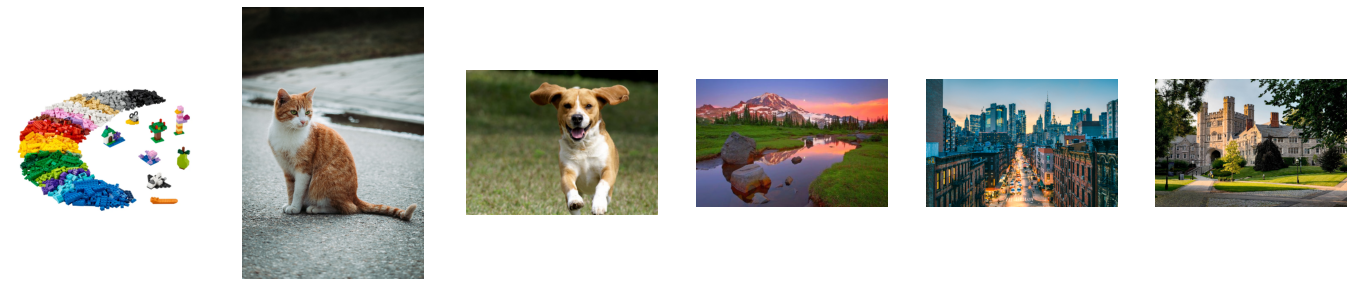

In [2]:
# Here are images you will use to check your implementation.
filenames = ['imgs/lego.png', 'imgs/cat.jpeg', 'imgs/dog.jpeg',  'imgs/nature.jpeg', 'imgs/nyc.jpeg', 'imgs/princeton.jpeg']

plt.figure(figsize=(4*len(filenames), 5))
for i in range(len(filenames)):
    img = cv2.imread(filenames[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    height, width, nchannel = img.shape
    scale = 500/max(height, width) # The longer side will be resized to 500
    img = cv2.resize(img, (int(width*scale), int(height*scale)))
    plt.subplot(1, len(filenames), i+1)
    plt.imshow(img); plt.axis('off')
plt.show()

### 1-a. Implement the K-means clustering algorithm in `kmeans.py` (10 points)

After implementing the K-means clustering algorithm in `kmeans.py`, use the below code to segment a given image into regions with similar colors.

In [3]:
# Import your implementation
from kmeans import kmeans

#### JRB- Distance testing 

Below is a bit of code to test kmeans in nb before writing function. 
The goal here is to make smaller image (X) and centriod (C) matrices
to test out different euclidian distance calculations

**1. Load in image & preformat**


raw image shape: (1500, 1000, 3)
post scaling shape: (333, 500, 3), 
1d flattend shape: (166500, 3)


Text(0.5, 1.0, 'scaled 2d image')

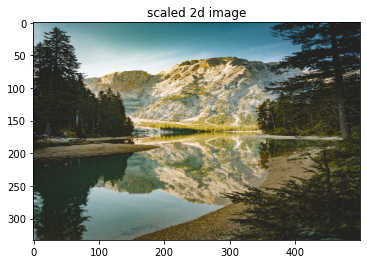

In [4]:
"""Load in example image and process for kmeans"""
img = cv2.imread('imgs/example.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(f"raw image shape: {img.shape}")

# plt.imshow(img)

scale = 500/max(height, width)
img = cv2.resize(img, (int(width*scale), int(height*scale)))
x = img.reshape((-1, 3)).astype(np.float32)
print(f"post scaling shape: {img.shape}, \n1d flattend shape: {x.shape}")

plt.imshow(img)
plt.title("scaled 2d image")

**2. Generate example centriod (C) and data (X) matrcies**

In [5]:

K = 5 # number of cluster to test

## start kmeans.py code ##
# only use pixels that have novel information
unique_colors = np.unique(x.reshape(-1, 3), axis=0)

idx = np.random.choice(len(unique_colors), K, replace=False)
C = unique_colors[idx, :] # centriod matrix
## end kmeans.py code ##

print(f"centriod matrix C shape with K = 5 : {C.shape}")

centriod matrix C shape with K = 5 : (5, 3)


In [6]:
n_pixels = 10
X = x[0:n_pixels, :]

print(f"image matrix X shape with n_pixels = {n_pixels} : {X.shape}")

image matrix X shape with n_pixels = 10 : (10, 3)


In [7]:
M = X.shape[0] # n pixels
N = C.shape[0] # n centriods (K)

**3. Calculate metric via iteration**

For each pixel, for each centriod, calcualte the distance (L2) between pixel and centriod. Store in a distance matrix.

In [8]:
sD = np.zeros((M,N))

for ipixel, x_i in enumerate(X):
    for icentriod, c_i in enumerate(C):
        sD[ipixel, icentriod] = np.linalg.norm(x_i - c_i)

**4. Calculate metric via matrix multiplication**

Use matrix multiplication by expanding euclidian distance.

$$\sqrt{({a} + {b})^2} = \sqrt{(a*a) + (b*b) - 2(a*b)}$$ 

Where distance matrix ${D}_{MxN}$ can be found between two matrices $A_{MxK}$ and $B_{NxK}$.

![Alt text](imgs/matrix_distance.PNG)


Detailed information found [here](https://www.dabblingbadger.com/blog/2020/2/27/implementing-euclidean-distance-matrix-calculations-from-scratch-in-python). 

In [9]:
X_dots = (X * X).sum(axis=1).reshape(M, 1) * np.ones(shape=(1,N))
C_dots = (C*C).sum(axis=1)*np.ones(shape=(M,1))

mD = np.sqrt(X_dots + C_dots - (2 * np.dot(X, C.T)))


#### JRB end

In [15]:
def run_kmeans(K, niter, filename):
    
    # Load and transform an image
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    height, width, nchannel = img.shape
    scale = 500/max(height, width) # The longer side will be resized to 500
    img = cv2.resize(img, (int(width*scale), int(height*scale)))

    # Vectorize the image
    x = img.reshape((-1, 3)).astype(np.float32)

    # Run K-means clustering
    labels, centroids = kmeans(x, K, niter)
    
    # Produce the resulting image segmentation. 
    centroids = np.uint8(centroids)
    labels = np.int8(labels)
    result = centroids[labels.flatten()]
    result_image = result.reshape((img.shape))

    # Visualize the original image and the segmentation.
    plt.figure(figsize=(10, 10))
    plt.subplot(1,2,1)
    plt.imshow(img); plt.title('Original Image'); plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(result_image); plt.title('Segmented Image (K={})'.format(K)); plt.axis('off')
    plt.show()
    
    plt.figure(figsize=(10, 5))
    for k in range(K):
        plt.subplot(1,K,k+1)
        result_image = np.ones_like(img) * 128
        
        result_image[labels.reshape((img.shape[:2]))==k] = centroids[k]
        
        plt.imshow(result_image); plt.title(f'Seg ID: {k}'); plt.axis('off')
    print("")

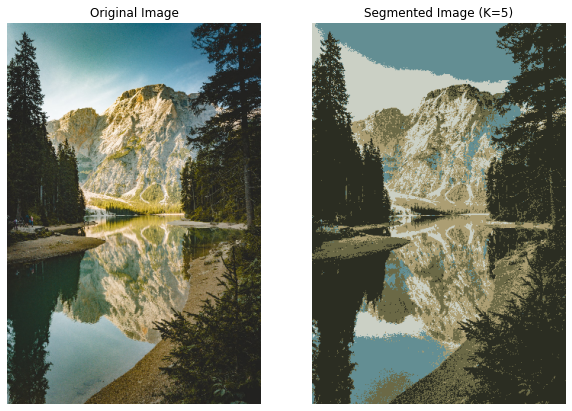

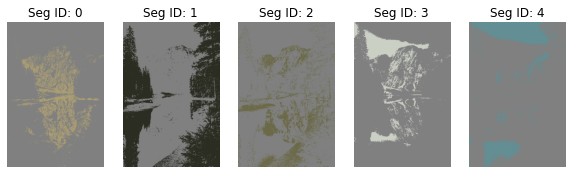

In [18]:
# Define the arguments
K = 5
niter = 20
filename = 'imgs/example.jpeg'

# Run K-means
run_kmeans(K, niter, filename)

### b) Experiment with different values of K. Discuss which value of K seems to be the best for each of the test images. (5 points)

In [ ]:
# Define the arguments
K = 5
niter = 3

# Run K-means
for i in range(len(filenames)):
    run_kmeans(K, niter, filenames[i])